# **What is Machine Learning ?**
Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it to learn for themselves.
## How do we define it in terms everyone can understand?
Machine learning is a computer program/an algorithm when fed with a lot of data in form of numbers finds patterns and similarity in those data and make predictions for that data.
### Supervised Learning
This machine leaning alorithms is nothing but a self learning algorithm with makes use of the data in forms of these numbers and preform several computation(Operations) and learns through its mistakes(Discussed later), This is called a supervised learning where the alogithm knows its mistakes/how wrong its from the orginal values

## You would get a question how can it find patterns ?
For that first lets define what's data and how the data is structured
### Data 🤔
Data is numbers or text or anything which gives some meaning or in other terms which has some structure and tells us about something
* Data Can be in any format

### Now that we know whats Data lets see Data in Machine Learning

The building block of Machine learning is Maths, We all know that, But what kind of math?🤔

## Y = mX + c

Does this Look familiar?

Yes Its that same equation of line we studied in class 11 and 12 which comes under the part of linear alegbra

## Y = aX^2 + bX + c ?

Yes this is a equation of degree 2, This is the fundamentals of machine learning

### Now lets think can we use text or audio in equation?

The answer is technically no (There's a way😯 to convert it into digits), So if we are given x = 10 and y = 26 and the equation y = aX^2 + bX + c can we find out values of a b c where x and y are true

YES! Thats machine Learning for you, We make patterns/Relations between the given input which is x and output which is y, but adjusting values of a b c, but solving it we get a = ? waittt! we cant do with, we only know to get x when a b c are given but its possible but solving the equations and finding a b c

## aX^5 + bX^4 + cX^3 + dX^2 + cX + e 

For This😥 doesn't it look very hard to find a b c so on... Theres a more suitable way to do this and its called GRADIENT DESCENT!😯

## And here comes the math intensive part!😉😎

### Gradient Descent

What's a gradient?

It Gives us the change in y when there's a change in x. 

Let Y be the loss (difference between the orginal value and found value)

We need to minimize lhe loss

this gradient shows us if we change the Equation value of A by the gradient the value of a becomes closer to the required value of a, And this done n number of time we reach close and closer to the required value and same does also for the other valriables.

Thus finding the values of a b c where the loss which is Y is the minimum

A small tip WE ARE FINDING THE LOCAL MINIMA FOR THE GIVEN EQUATION!

https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent this beautiful aritcle gives us a great explaination of gradient descent (Linear algebra and calculus knowledge upto partial derivative of multivariable calculus required)

## *Now Lets put everything together. So basic Machine Learning is when a data containing a input X and ouput Y we find the relation/patterns between them by using linear equations(not all cases) and optimizing them (minimizing the loss) between the generated y and given y using gradient descent thus more the degree of the equation less the loss and more the variables to fine tune the equation to get Y as the output to make loss near 0.*

Now that we have a basic idea of what machine learning is let us see machine learning in action.

(The algorithm and field used here is Deep learning and Convolutional neural networks but the basic concepts of equations and gradient descent is the same but a little more concept intensive but that doesnt mean u cant enjoy this results)

# Importing The Data

*   This Notebook is Trained using the ASL Dataset from Kaggle
*   https://www.kaggle.com/grassknoted/asl-alphabet
*   Each Class Contains 3000 Photos of each Alphabet





### Mount and Set File Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path="/content/drive/MyDrive/archive.zip"

### UnZip the Data Fromm Drive

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [ ]:
import os
for i in os.listdir():
    print(i)

.config
asl_alphabet_train
drive
asl_alphabet_test
sample_data


# Creating The Model Using tensorflow and Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow. keras.layers import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.models import *
from tensorflow import keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
path_train='/content/asl_alphabet_train/asl_alphabet_train'

### Visualizing The Images Of the DataSet

In [ ]:
def show_image(images , figsize=(20,10), columns = 3):
   plt.figure(figsize=figsize)
   for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      x=Image.open(image)
      plt.title(image.split("/")[4][0],fontsize=20,color="black")
      plt.imshow(x)

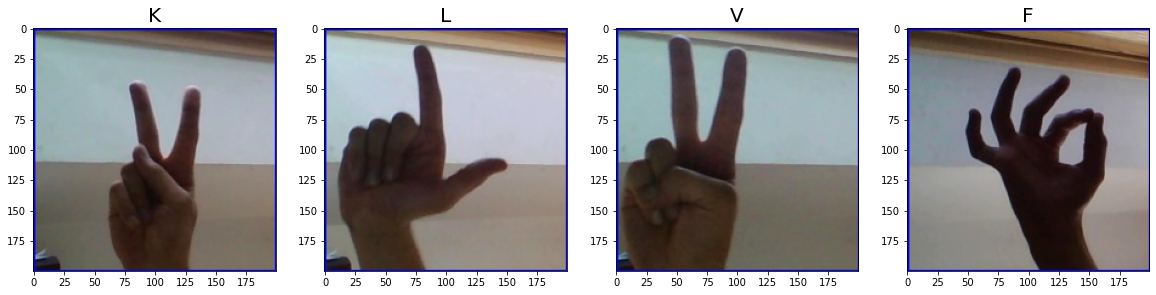

In [ ]:
img_paths=["/content/asl_alphabet_test/asl_alphabet_test/K_test.jpg",
           "/content/asl_alphabet_test/asl_alphabet_test/L_test.jpg",
           "/content/asl_alphabet_test/asl_alphabet_test/V_test.jpg",
           "/content/asl_alphabet_test/asl_alphabet_test/F_test.jpg"]
show_image(img_paths,columns=4)

# Generating Training Data With the keras.image Module



*   Contains 80,000 Images With 3000 in each Class
*   Target Size = (256,256)
*   Batch_Size = 128





In [ ]:
train_data_flow=image.ImageDataGenerator(horizontal_flip=True,
                                         rescale=1./255,
                                         rotation_range=20, 
                                         zoom_range=0.2,
                                         shear_range=0.2)
train=train_data_flow.flow_from_directory(path_train,batch_size=128, target_size=(256, 256))

Found 87000 images belonging to 29 classes.


# Creating The Model

* In the past few decades, Deep Learning has proved to be a very powerful tool  because of its ability to handle large amounts of data. The interest to use hidden layers has surpassed traditional techniques, especially in pattern recognition. One of the most popular deep neural networks is Convolutional Neural Networks.

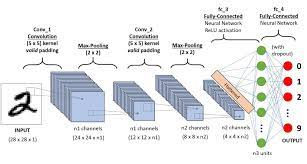

* Before we go to the working of CNN let’s cover the basics such as what is an image and how is it represented. An RGB image is nothing but a matrix of pixel values having three channels of R G B where each pixel in R is the Value of color Red in that position similar for Blue and Green

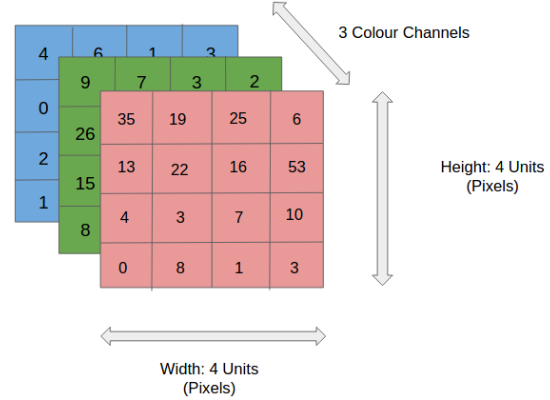

## Convolution

The convolution operation is an variant of multiplication of 2 matrix where one matrix is much smaller than the other, we know how to find the dot product of the matrix. This is just simply find the dot products by slidind the small matrix over the bigger one and reconding the values in an another matrix.This result matrix is the output of the convolution operation

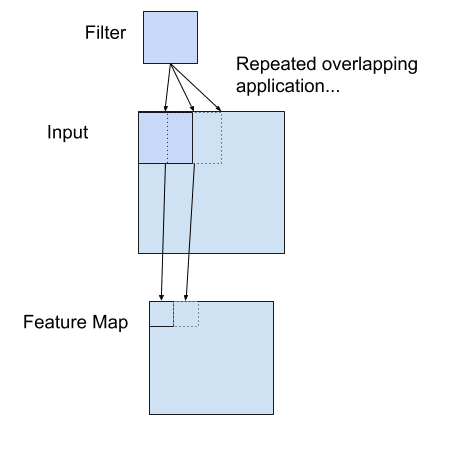

* Atlast after these operations this model gives us a vector of 29 elements classifying the alphabet with respect to the index where 1 is present

### model.add(Conv2D(32, (3, 3),activation="relu", input_shape=(256, 256, 3)))
* This is the convolution layer with 32 Filters and a size of 3 X 3

### model.add(MaxPooling2D((2, 2)))
* This is the MaxPooling Layer which reduces the size of the image by half as its a 2 X 2 filter

### model.add(BatchNormalization())
* BatchNormalization is a technique which makes the mean to be 0 and the standarad deviation to be 1. WHICH IN NORMAL TERMS MEAN THE SPREAD/DISTRIBUTION OF THE VALUES TO BE 1 (Standard deviation) and the

### model.add(Flatten())
* This Flattens the filters meaning it makes the matrix of M x N to M*N

### model.add(Dense(1024 ,activation='relu'))
* This just creates a vector of layer which is just a matrix of weights

### model.add(Dense(29, activation='softmax'))
* This outputs the vector of size 1,29 which is the probabities of the images belonging to a class. In comon meaning each value is either close to 0 or 1 in kost cases and the value where its one or greater than 0.5 its considered the index of the value is the class

### Atlast we get a vector [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
### where ------------------------- a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,del,nothing,space is the corresponding Index

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation="relu", input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256,(3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256,(3, 3),activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(29, activation='softmax'))

### Visualizing The Model

In [ ]:
!pip install visualkeras

In [ ]:
from collections import defaultdict
import visualkeras

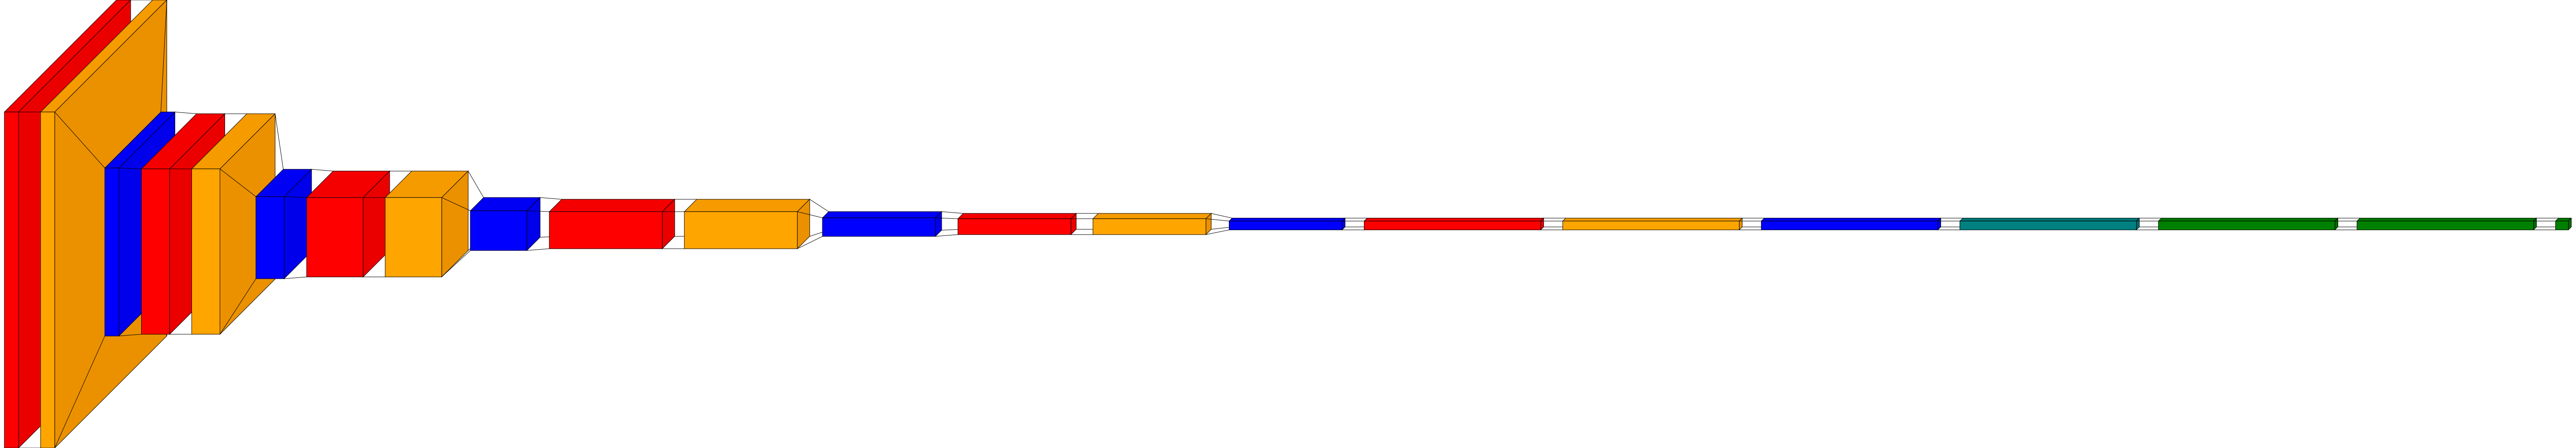

In [ ]:
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'red'
color_map[BatchNormalization]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'red'
color_map[MaxPooling2D]['fill'] = 'blue'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model,scale_xy=3, scale_z=1,spacing=50,color_map=color_map)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_17 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

### Compiling The Model
* This compiles the model and makes it ready for training and testing by adding the loss which in normal terms means the difference between the input and output and the optimizer which reduces the loss meaning helps the difference to near Zero

In [ ]:
met = tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.009),metrics=met)

### Training The Model
* This trains the model with the training data for n number of epochs which simply mean the number of times its trained repeatedly

In [ ]:
model.fit(train,epochs=1,batch_size=128)

680/680 [==============================] - 1340s 2s/step - loss: 0.0858 - accuracy: 0.9715


### Evaluating The Model
* This evaluates the model on the input data and gives the loss and the acuraccy of the predictions

In [ ]:
model.evaluate(train)

680/680 [==============================] - 1253s 2s/step - loss: 0.0694 - accuracy: 0.9773


[0.06942476332187653, 0.9772529006004333]

### Saving The Model
* This save the model along with the weights and makes it easy for storing it and using it again to continue training

In [ ]:
model.save("/content/drive/MyDrive/Model_ASL_diy")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model_ASL_diy/assets
